# Business Intelligence Report: Car Insurance Total Claim Amounts

# Context

Insurances originated from a general demand of society asking for protection against unforeseeable events which may cause severe (financial) damage to individuals. Insurance companies provide a protection against such events and cover the arising financial expenses. The main idea behind it is the establishment of a community (collective), whereby each member contributes a certain amount of money (premium) and the emerging financial damages are covered by the funds of the community. The insurers themselves are in charge of drafting the corresponding contracts, determining appropriate premiums and paying off potential claims.

# Objective

The objective of this report is to support senior management by providing data-driven answers to business questions that will help the organisation to better understand their customers, improve their services, and improve profitability.

## Business Objectives

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

In [8]:
# import libraries to use (pandas, matplotlib.pyplot and seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analysis

The below analysis uses the provided data frame, below:

In [12]:
customer_df = pd.read_csv(r'Data_Marketing_Customer_Analysis_Round3.csv')
customer_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## Total Number of Response

Metric Definition: we don't know what this field is, or what the question for the response even was, but we will base our entire analysis off of it. #bestpractices

Methodology: YOLO

Text(0, 0.5, 'Responses')

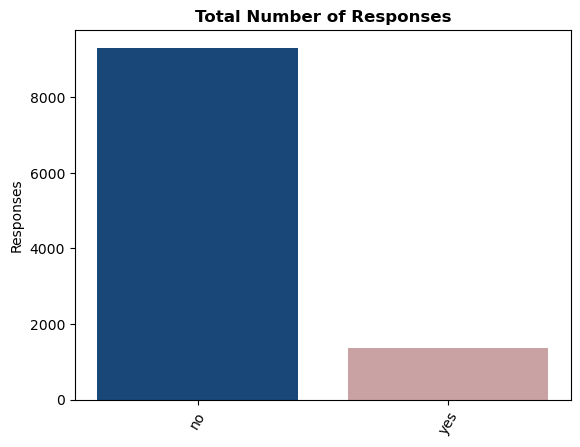

In [13]:
response_count = customer_df['response'].value_counts()
response_count
plt.bar(response_count.index, response_count, color=('#184778','#c9a2a3'))

plt.title('Total Number of Responses', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["no","yes"], rotation = 60) 
plt.ylabel("Responses")

Key Takeaway: it seems that the response to the question we don't know is overwhelming "no".

## Response by Sales Channel

Metric Definition: Sales channels for the car insurance company is defined by the channel through which the customer is contracting their insurance policy. It counts the signature as the event for recording the channel, therefore a sale cannot be multichannel. Yes, I made that up.

Methodology: In the analysis below, we compare the mystery responses to the Sales Channels, which can be agent, web, branch or call center.

<AxesSubplot:title={'center':'Responses by sales channel'}, xlabel='sales_channel', ylabel='count'>

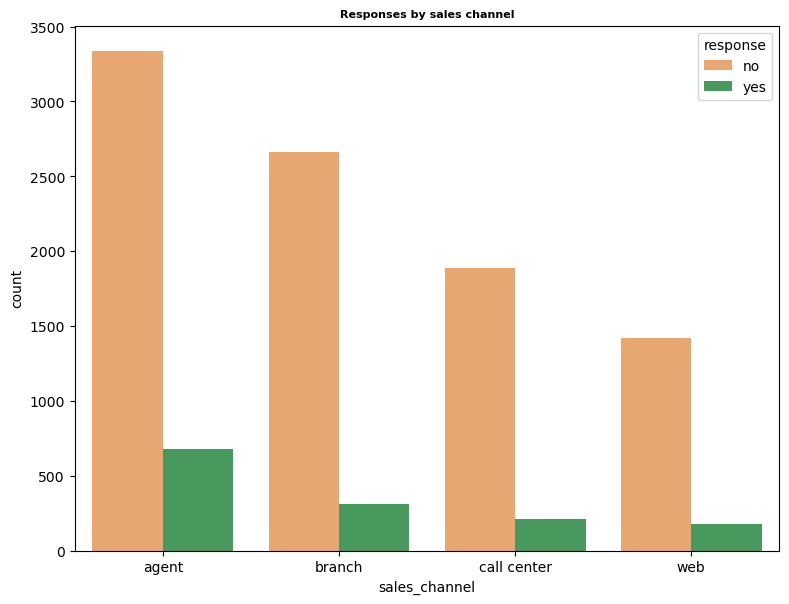

In [24]:
response_sales = customer_df.groupby(['response','sales_channel'])['response'].count().rename('count').reset_index()
response_sales
sns.set_palette('RdYlGn') 
palette_sales_channel_r = {"yes": "C5", "no": "C1"}
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)

plt.title('Responses by sales channel', size='8', fontweight='bold')


sns.barplot(x = response_sales['sales_channel'],y = response_sales['count'], hue = response_sales['response'], palette=palette_sales_channel_r)




Key Takeaway: Agents are able to collect more information than any other sales channel (the response rate of the agents is higher). Shocker. But they also do seem to get a proportionally higher amount of "yeses" to that mystery question.

## Response by Total Claim Amount

Metric Definition: 

Methodology:

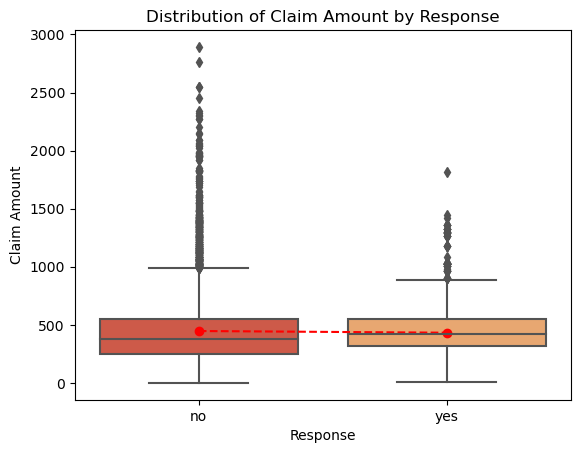

In [25]:
yes_mean = customer_df[customer_df['response']=='yes']['total_claim_amount'].mean()
no_mean = customer_df[customer_df['response']=='no']['total_claim_amount'].mean()


sns.boxplot(data=customer_df, x='response', y='total_claim_amount')
plt.plot([0, 1], [yes_mean, no_mean], marker='o', linestyle='--', color='red')


plt.title('Distribution of Claim Amount by Response')
plt.xlabel('Response')
plt.ylabel('Claim Amount')

plt.show()

Key Takeaway: As a business, the data sample shows that "yes" customers are more profitable for customer retention activities than "no" customers.

## Response by Income

Metric Definition: 

Methodology:

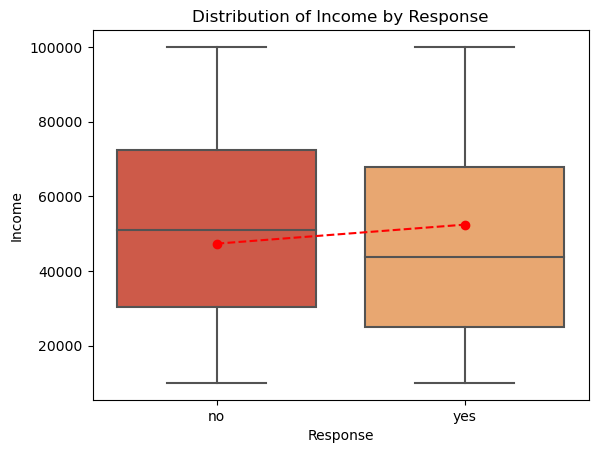

In [26]:
yes_mean = customer_df[customer_df['response']=='yes']['income'].mean()
no_mean = customer_df[customer_df['response']=='no']['income'].mean()


sns.boxplot(data=customer_df, x='response', y='income')
plt.plot([0, 1], [yes_mean, no_mean], marker='o', linestyle='--', color='red')


plt.title('Distribution of Income by Response')
plt.xlabel('Response')
plt.ylabel('Income')

plt.show()

Key Takeaway:

# Conclusion

Please don't take any business decision off of this analysis :0)

We were able to give a short idea of a few applications of python, pandas and plotting analysis in the context
of car insurance. However it became rather obvious that the broad possibilities of such methods cannot be summarized in such a short section, without the theory becoming too detailed for the actual framework. 